# 2. Data Acquisition And Understanding

## 2.1 Import Library, Load dan Mengenal Dataset

Dataset **[Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)** di Kaggle berisi sekitar **8.248 data mobil bekas** yang dikumpulkan dari situs *syarah.com*. Setiap entri mencakup informasi seperti **merek, model, tahun, warna, bahan bakar, transmisi, jarak tempuh, lokasi, dan harga**. Dataset ini sering digunakan untuk **analisis tren pasar mobil bekas di Arab Saudi** serta pembuatan **model prediksi harga mobil** berbasis machine learning. Karena sebagian data masih dalam bahasa Arab, biasanya dilakukan **pembersihan dan penerjemahan kolom** sebelum analisis. Secara keseluruhan, dataset ini memberikan gambaran komprehensif tentang faktor-faktor yang memengaruhi harga mobil bekas di wilayah tersebut.

In [154]:
# Import library dan load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [155]:
# Load dataset
data_path = '../Dataset/UsedCarsSA_Unclean_EN.csv'
real_df = pd.read_csv(data_path)
df = real_df.copy()
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


Berikut adalah **deskripsi kolom** untuk dataset **[Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)**:

* **Link** — Tautan ke halaman iklan mobil di situs *syarah.com*.
* **Make** — Nama perusahaan atau merek mobil.
* **Type** — Jenis atau model mobil bekas.
* **Year** — Tahun pembuatan mobil.
* **Origin** — Asal atau negara produksi mobil.
* **Color** — Warna mobil.
* **Options** — Fitur atau opsi tambahan yang dimiliki mobil.
* **Engine_Size** — Ukuran atau kapasitas mesin mobil.
* **Fuel_Type** — Jenis bahan bakar yang digunakan mobil.
* **Gear_Type** — Jenis transmisi mobil (manual atau otomatis).
* **Condition** — Kondisi mobil (misalnya baru, bekas ringan, atau bekas berat).
* **Mileage** — Jarak tempuh mobil (biasanya dalam kilometer).
* **Region** — Wilayah atau kota tempat mobil dijual di Arab Saudi.
* **Price** — Harga jual mobil dalam mata uang lokal (SAR).
* **Negotiable** — Menunjukkan apakah harga masih dapat dinegosiasikan (ya/tidak).


## 2.2 Quick Data Health Check

### 2.2.1 Melihat ukuran data (baris dan kolom)

In [156]:
# Informasi umum dataset
print('Shape (rows, columns):', df.shape)

Shape (rows, columns): (8248, 15)


### 2.2.2 Melihat tipe data

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


### 2.2.3 Statistik deskriptif

In [158]:
# Statistik deskriptif numerik
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,8248.0,2014.014064,5.935349,1936.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5982.0,3.175794,1.567480,1.0,2.0,2.7,4.0,9.0
Mileage,8248.0,149412.813531,345525.845645,100.0,37000.0,101657.5,195552.0,20000000.0


In [159]:
# Statistik deskriptif semua kolom (termasuk kategorikal)
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Link,8248,8228,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,8248,65,Toyota,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,8248,435,Land Cruiser,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,8248.0,NaN,NaN,NaN,2014.014064,5.935349,1936.0,2012.0,2016.0,2018.0,2022.0
Origin,8153,3,Saudi,6084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,8248,15,White,3574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Options,8139,3,Full,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,5982.0,NaN,NaN,NaN,3.175794,1.56748,1.0,2.0,2.7,4.0,9.0
Fuel_Type,8248,3,Gas,8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gear_Type,8174,2,Automatic,7069,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.4 Melihat Ringkasan Nilai Unik per Kolom

In [160]:
def unique_summary(frame, sample_size=5):
    result = []
    for col in frame.columns:
        uniques = frame[col].dropna().unique()
        result.append({
            'Column': col,
            'Unique Count': frame[col].nunique(),
            'Sample Unique': list(uniques[:sample_size])
        })
    return pd.DataFrame(result).sort_values('Unique Count', ascending=False).reset_index(drop=True)

unique_summary(df)

,Column,Unique Count,Sample Unique
0,Link,8228,[https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D...
1,Mileage,2196,"[103000, 5448, 72418, 114154, 41912]"
2,Price,549,"[114000, Negotiable, 27500, 43000, 59500]"
3,Type,435,"[C300, Patrol, Sunny, Elantra, Accord]"
4,Engine_Size,75,"[5.7, 4.8, 1.5, 1.6, 2.0]"
5,Make,65,"[Chrysler, Nissan, Hyundai, Honda, Toyota]"
6,Year,55,"[2018, 2016, 2019, 2011, 2009]"
7,Region,27,"[Riyadh, Jeddah, Dammam, Al-Medina, Qassim]"
8,Color,15,"[Black, White, Silver, Grey, Navy]"
9,Origin,3,"[Saudi, Gulf Arabic, Other]"


In [161]:
def unique_summary_col(df, col):
    """
    Menampilkan distribusi nilai unik dari satu kolom dalam bentuk tabel ringkas.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset input.
    col : str
        Nama kolom yang ingin dianalisis.
    """

    if col not in df.columns:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
        return

    # Hitung jumlah dan persentase tiap nilai unik
    counts = df[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, 'Count']
    counts['Percentage'] = (counts['Count'] / len(df)) * 100

    # Tampilkan tabel ringkasan
    print(f"\n📊 Distribusi Nilai Unik Kolom: '{col}'")
    display(counts.style.format({'Percentage': '{:.2f}%'}))

    return counts

### 2.2.4 Melihat Missing Values

<Axes: >

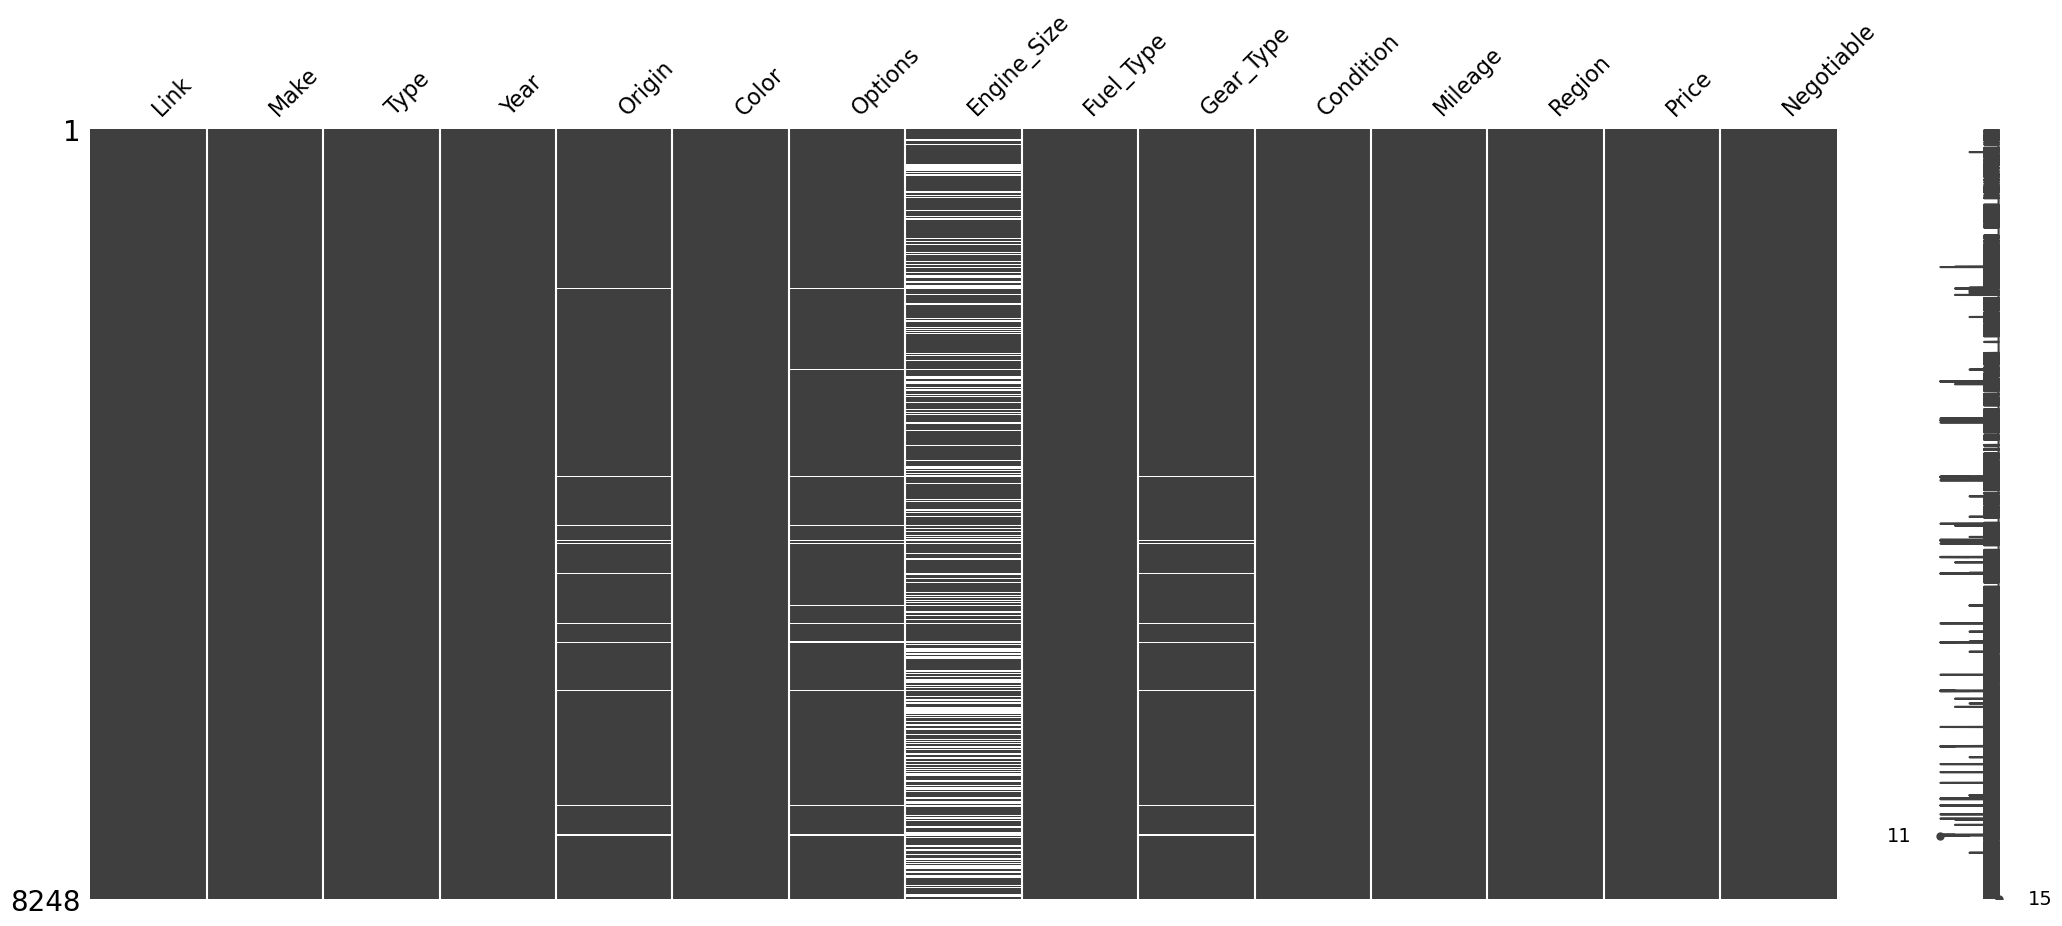

In [162]:
df.isnull().sum().sort_values(ascending=False)
msno.matrix(df)

<Axes: >

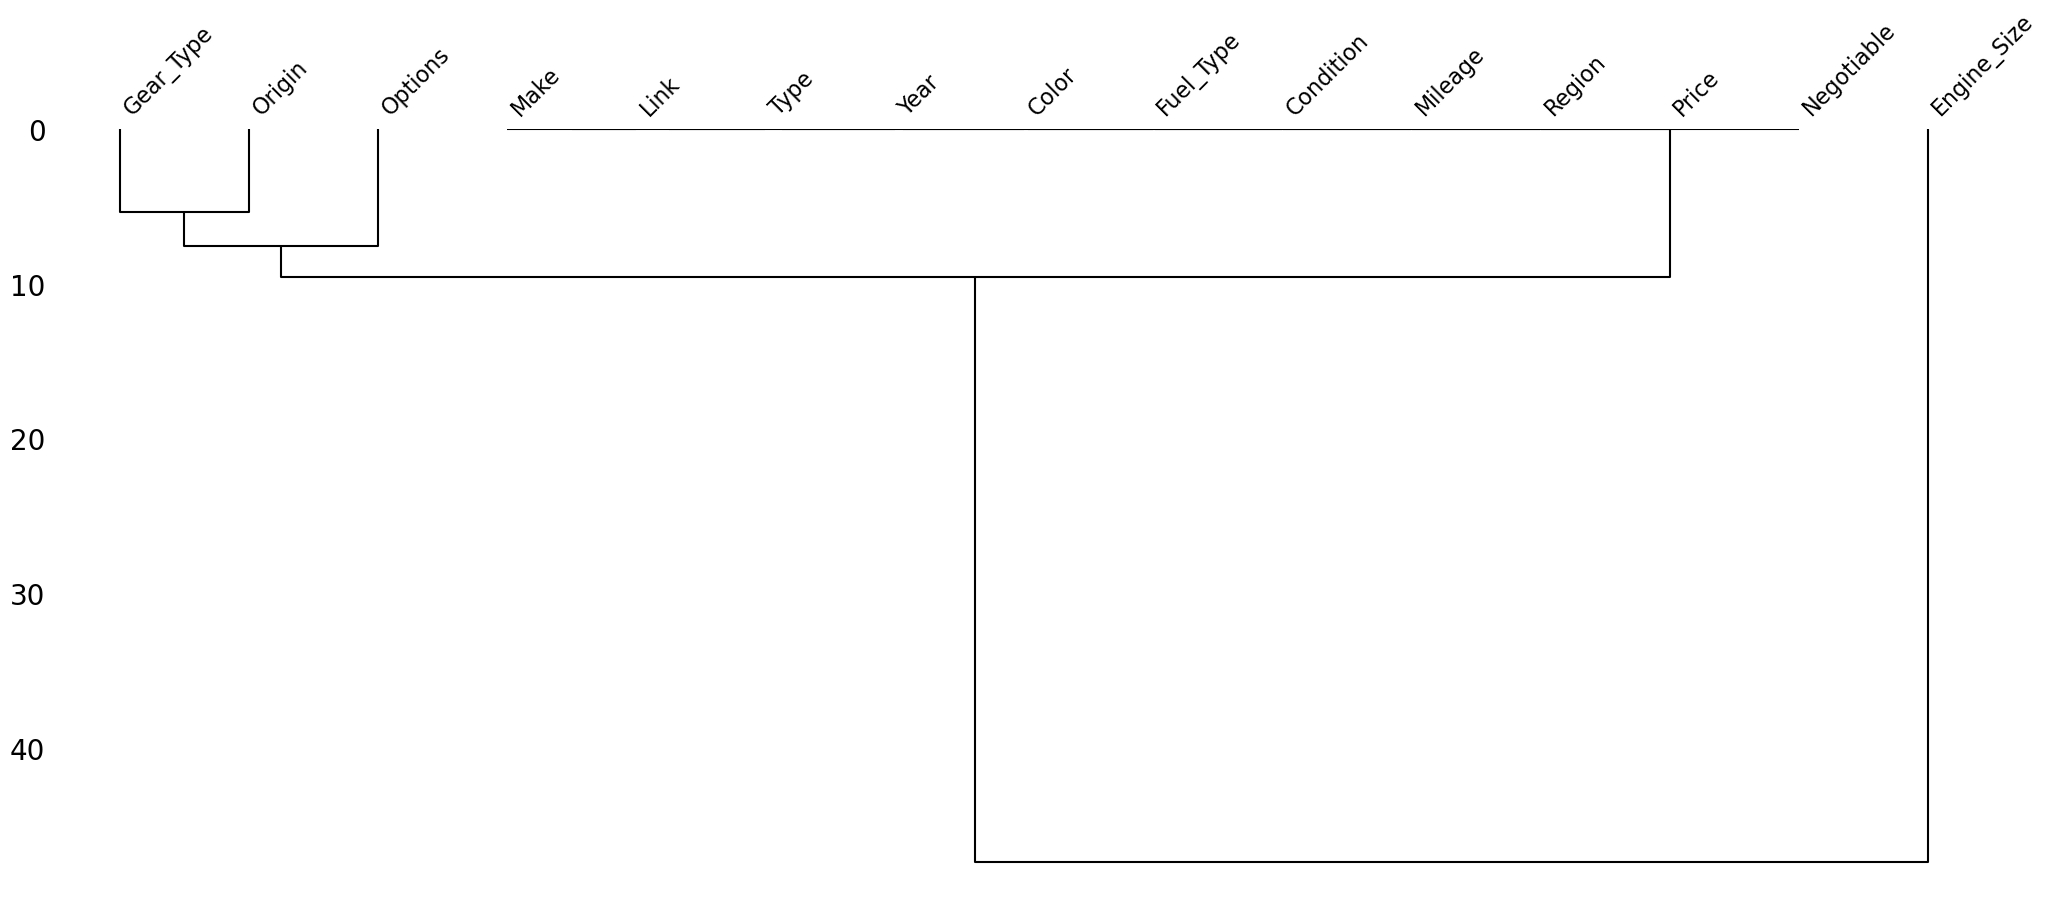

In [163]:
msno.dendrogram(df)

### 2.2.6 Melihat Normalitas Numerik

In [164]:
def check_normality(df, cols=None):
    """
    Fungsi untuk memeriksa normalitas distribusi numerik:
    - Menampilkan skewness & kurtosis
    - Menampilkan histogram + KDE dan boxplot untuk tiap kolom

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe input
    cols : list (opsional)
        Daftar kolom yang ingin dianalisis. Jika None → semua kolom numerik.
    """

    # Buat salinan agar data asli aman
    df_temp = df.copy()

    # Tentukan kolom numerik
    if cols is None:
        cols = df_temp.select_dtypes(include=[np.number]).columns.tolist()

    # Konversi kolom ke numerik sementara (jaga-jaga kalau masih object)
    for col in cols:
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

    # Hitung skewness & kurtosis
    normality_df = df_temp[cols].agg(['skew', 'kurtosis']).transpose()
    print("\n📊 Ringkasan Skewness & Kurtosis:")
    display(normality_df)

    # Visualisasi tiap kolom
    for col in cols:
        fig, axes = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]})

        # Histogram + KDE
        sns.histplot(df_temp[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribusi {col}', fontsize=12)
        axes[0].set_xlabel('')

        # Boxplot
        sns.boxplot(x=df_temp[col], ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot {col}', fontsize=11)

        plt.tight_layout()
        plt.show()


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Year,-2.615889,12.729579


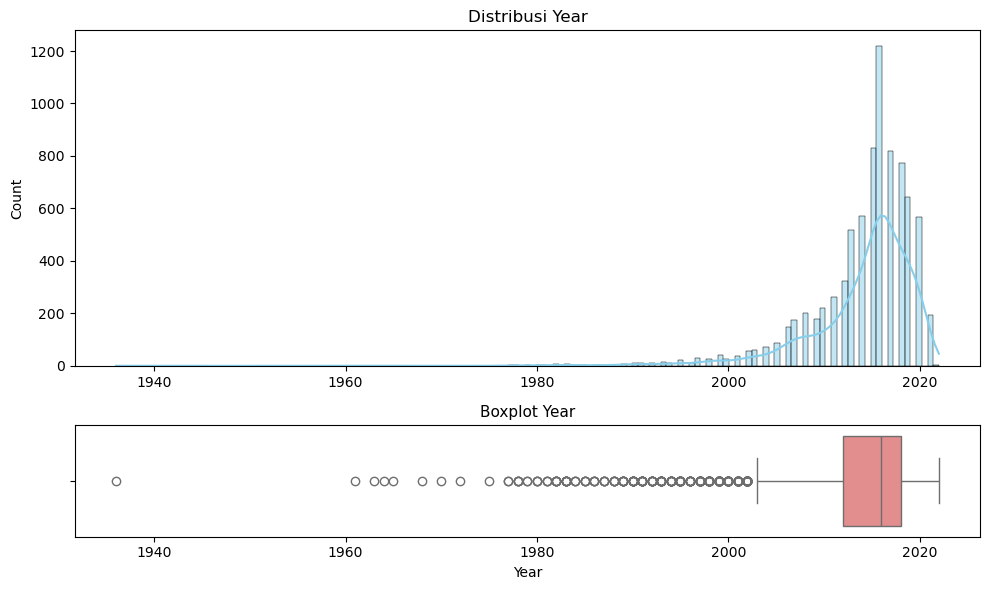

In [165]:
# Jalankan analisis normalitas per kolom
check_normality(df, ['Year'])


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Engine_Size,0.948518,0.599946


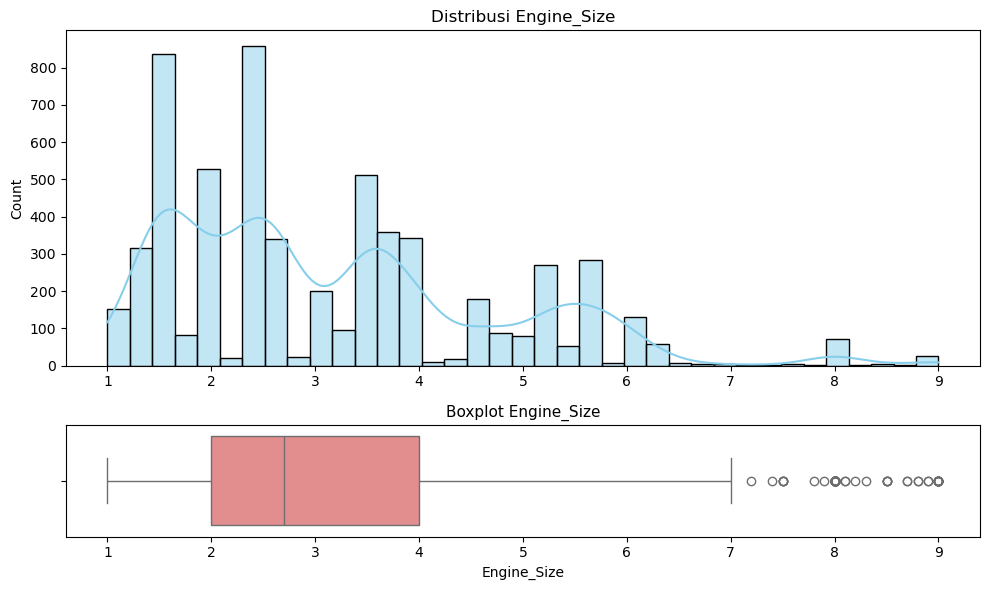

In [166]:
check_normality(df, ['Engine_Size'])


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Mileage,29.592851,1438.938083


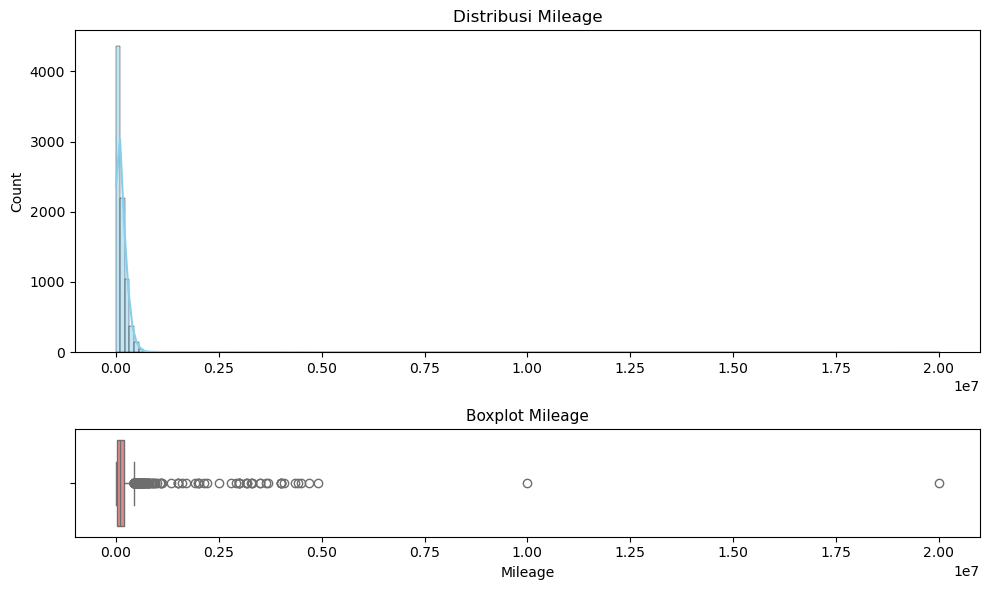

In [167]:
check_normality(df, ['Mileage'])


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Price,3.691729,24.285586


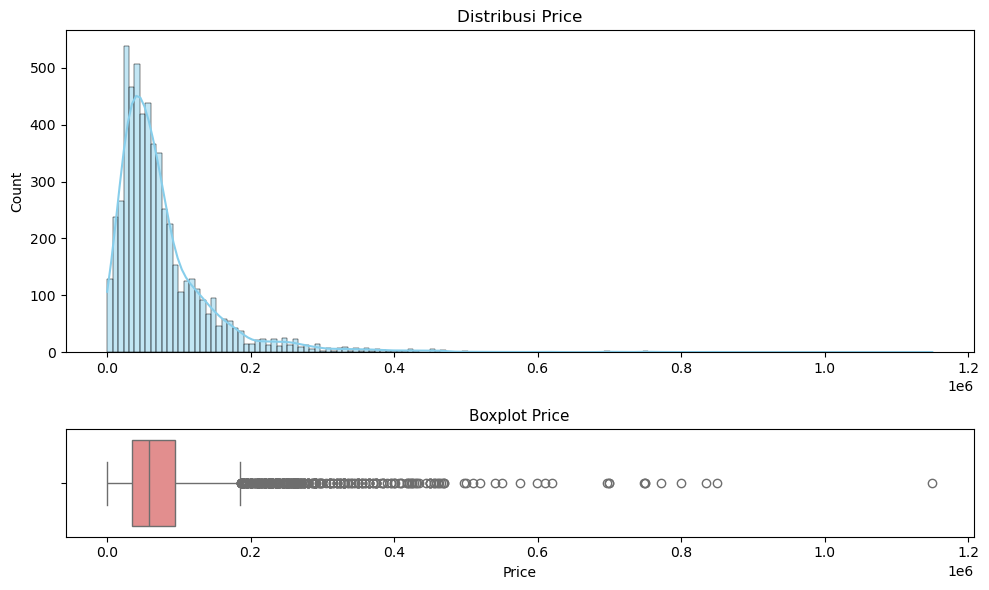

In [168]:
check_normality(df, ['Price'])

## 2.5 Menangani Missing Values

Langkah pertama adalah memeriksa kolom mana yang memiliki nilai kosong (*missing*).

### Strategi Umum Imputasi

- **Engine_Size:** diisi dengan modus berdasarkan kombinasi `(Type, Year)`.
- **Gear_Type:** diisi dengan modus global.
- Kolom lain: tergantung konteks — misalnya median untuk numerik atau 'Unknown' untuk kategorikal.

Kita buat salinan dataset sebelum melakukan imputasi.

In [169]:
df = df.copy()

# Imputasi Engine_Size dengan modus per (Type, Year)
engine_group_mode = (
    df.groupby(['Type', 'Year'])['Engine_Size']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

def fill_engine_size(row):
    if pd.notna(row['Engine_Size']):
        return row['Engine_Size']
    key = (row['Type'], row['Year'])
    val = engine_group_mode.get(key, np.nan)
    return val

df['Engine_Size'] = df.apply(fill_engine_size, axis=1)

# Jika masih ada NaN, isi dengan modus global
if df['Engine_Size'].isna().sum() > 0:
    global_mode = df['Engine_Size'].mode().iloc[0]
    df['Engine_Size'].fillna(global_mode, inplace=True)

# Imputasi Gear_Type
if df['Gear_Type'].isna().sum() > 0:
    gear_mode = df['Gear_Type'].mode().iloc[0]
    df['Gear_Type'].fillna(gear_mode, inplace=True)

# Untuk kolom kategorikal lainnya
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

print('Missing values setelah imputasi:')
df.isna().sum().sum()

Missing values setelah imputasi:


np.int64(0)

## 2.6 Menghapus Kolom yang Tidak Relevan

Beberapa kolom tidak memiliki informasi prediktif atau hanya bersifat administratif, sehingga bisa dihapus:
- `Link` (URL halaman web)
- `Condition` (jika hanya berisi satu nilai: 'Used')
- `Negotiable` (informasi negosiasi harga, tidak relevan untuk prediksi harga dasar)

In [170]:
cols_to_drop = ['Link', 'Condition', 'Negotiable']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True, errors='ignore')
df.shape

(8248, 12)

## 2.7 Menghapus Duplikat dan Menangani Outlier Harga

Duplikat data akan dihapus untuk menghindari bias.
Selain itu, harga yang terlalu ekstrem juga perlu difilter agar model tidak overfit pada outlier.

In [171]:
# Hapus duplikat
print('Jumlah duplikat sebelum dihapus:', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)

# Pastikan kolom Price numerik
df = df[pd.to_numeric(df['Price'], errors='coerce').notna()]
df['Price'] = df['Price'].astype(float)

# Hapus outlier harga ekstrem (1% bawah dan 99% atas)
q1, q99 = df['Price'].quantile([0.01, 0.99])
df = df[(df['Price'] >= q1) & (df['Price'] <= q99)]

print('Data setelah bersih:', df.shape)

Jumlah duplikat sebelum dihapus: 71
Data setelah bersih: (5482, 12)


## 2.8 Konversi Tipe Data

In [172]:
# Konversi tipe data
convert_dict = {
    'Year': 'int64',
    'Engine_Size': 'float64',
    'Mileage': 'float64',
    'Price': 'float64'
}

for col, dtype in convert_dict.items():
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype, errors='ignore')

# Kolom kategorikal
categorical_cols = [
    'Make', 'Type', 'Origin', 'Color',
    'Options', 'Fuel_Type', 'Gear_Type', 'Region', 'Condition', 'Negotiable'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Cek hasil
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5482 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         5482 non-null   category
 1   Type         5482 non-null   category
 2   Year         5482 non-null   int64   
 3   Origin       5482 non-null   category
 4   Color        5482 non-null   category
 5   Options      5482 non-null   category
 6   Engine_Size  5482 non-null   float64 
 7   Fuel_Type    5482 non-null   category
 8   Gear_Type    5482 non-null   category
 9   Mileage      5482 non-null   float64 
 10  Region       5482 non-null   category
 11  Price        5482 non-null   float64 
dtypes: category(8), float64(3), int64(1)
memory usage: 278.5 KB


## 2.9 Exploratory Data Analysis

In [173]:
pass

## 2.10 Simpan Dataset Bersih (Opsional)

In [174]:
df.to_csv('../Dataset/UsedCarsSA_Clean.csv', index=False)
print('Dataset bersih berhasil disimpan!')

Dataset bersih berhasil disimpan!
